In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt


In [2]:
os.chdir(r'G:\공유 드라이브\SicParvisMagna\데이터\코로나_매출')
df_1 = pd.read_csv('5~6월_매출_확진자_합평균.csv')
df_1.columns = ['index', '장기점', '성서점', '상인점', '3합', '3평', '달서확진']
df_1.index = df_1['index']
del df_1['index']
df_1

,장기점,성서점,상인점,3합,3평,달서확진
index,,,,,,
2021-05-01,1122000,3826000,2224000,7172000,2390666.67,0
2021-05-02,1130000,3642500,1874500,6647000,2215666.67,0
2021-05-03,1508000,1423500,1235000,4166500,1388833.33,1
2021-05-04,1304000,3416000,1901500,6621500,2207166.67,1
2021-05-05,928500,2795000,2019000,5742500,1914166.67,2
...,...,...,...,...,...,...
2021-06-26,1240500,3967000,2045500,7253000,2417666.67,8
2021-06-27,1299500,3109500,1656000,6065000,2021666.67,2
2021-06-28,948000,2203000,1809500,4960500,1653500.00,2


### 30일 덩어리
x = 2021-06-01 ~ 2021-06-30,     
y = 2021-05-01 ~ 2021-05-30 ~~~ 2021-05-31 ~ 2021-06-29 총 31개

#### 확진자 수

In [3]:
x1 = df_1['달서확진'][31:]
y1 = df_1['3평'][:30]

In [21]:
counts, bin_edges = np.histogram(x1, bins = len(x1.unique()), density = True)
counts

array([0.15555556, 0.09333333, 0.06222222, 0.12444444, 0.12444444,
       0.03111111, 0.03111111, 0.06222222, 0.12444444, 0.03111111,
       0.03111111, 0.03111111, 0.        , 0.03111111])

In [18]:
mu = np.mean(x1)    ## 모평균
x1_mean = np.mean(x1)
x1_std = np.std(x1, ddof = 1)

In [19]:
df = len(x1) - 1
t_ = t(df)
t_05 = t_.pdf(0.95)
L_ = round(x1_mean - t_05 * (x1_std / np.sqrt(30)), 2)
U_ = round(x1_mean + t_05 * (x1_std / np.sqrt(30)), 2)
print("{} < {} < {}".format(L_, mu, U_))

5.29 < 5.466666666666667 < 5.64


No handles with labels found to put in legend.


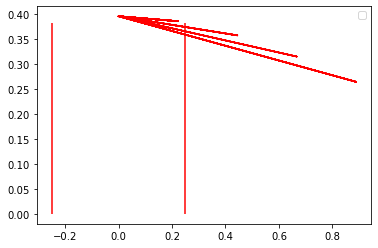

In [20]:
L_t= -t_05
U_t= t_05

x = counts

plt.vlines(L_t, 0, t_.pdf(L_t), colors="r")
plt.vlines(U_t, 0, t_.pdf(U_t), colors="r")
plt.plot(x, t_.pdf(x),'r-')
#plt.plot(x, t_.pdf(x),'r-', lw=2, alpha=0.6)

#plt.title()
plt.legend()
plt.show()